In [1]:
import os
import glob
import numpy as np
import awkward

In [2]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [4]:
# taken from the file_processor outputs -- update if needed
# v14 8gev
presel_eff = {1: 0.9952855229150378, 10: 0.9976172400798192, 100: 0.9979411114121182, 1000: 0.9981519444725636, 0: 0.04734728725337247}

In [5]:
sig_filelist = glob.glob('/home/duncansw/LDMX-scripts/GraphNet/plot_data/pnx_v14_8gev_2r_5en6_512_mew/v14_8gev_1*.parquet') + \
                 glob.glob('/home/duncansw/LDMX-scripts/GraphNet/plot_data/pnx_v14_8gev_2r_5en6_512_mew/v14_8gev_0*.parquet')
bkg_filelist = glob.glob('/home/duncansw/LDMX-scripts/GraphNet/plot_data/pnx_v14_8gev_2r_5en6_512_mew/*pn*.parquet')

sig_filelist_b = glob.glob('/home/duncansw/LDMX-scripts/GraphNet/plot_data/pnx_v14_8gev_5en3_128_1r/v14_8gev_1*.parquet') + \
                 glob.glob('/home/duncansw/LDMX-scripts/GraphNet/plot_data/pnx_v14_8gev_5en3_128_1r/v14_8gev_0*.parquet')
bkg_filelist_b = glob.glob('/home/duncansw/LDMX-scripts/GraphNet/plot_data/pnx_v14_8gev_5en3_128_1r/*pn*.parquet')

In [6]:
sig_tables = [awkward.from_parquet(f) for f in sig_filelist]
#print(sig_tables[0]['ParticleNet_extra_label'])
bkg_tables = [awkward.from_parquet(f) for f in bkg_filelist]
sig_tables_b = [awkward.from_parquet(f) for f in sig_filelist_b]
bkg_tables_b = [awkward.from_parquet(f) for f in bkg_filelist_b]
#sig_tables_c = [awkward.from_parquet(f) for f in sig_filelist_c]
#bkg_tables_c = [awkward.from_parquet(f) for f in bkg_filelist_c]
"""print("Loaded")
print("sig_tables:")
print(awkward.type(sig_tables[0]))
print("bkg_tables:")
print(awkward.type(bkg_tables[0]))
print("Found {} bkg files".format(len(bkg_tables)))

sig_table = sig_tables[0]['ParticleNet_disc']
sig_class = sig_tables[0]['ParticleNet_extra_label']
sig_distr = [sig_table[i] for i in range(len(sig_table)) if sig_class[i] == 1000]
bkg_table = bkg_tables[0]['ParticleNet_disc']
bkg_distr = [bkg_table[i] for i in range(len(bkg_table))]
print("Arrs ready")
# Plot discValue distr, just to check...
#bins = np.linspace(0.996, 0.998, 100)
bins = np.linspace(0, 1, 100)
plt.figure()
plt.hist(sig_distr, bins=bins, density=True, histtype='step', label="sig")
plt.hist(bkg_distr, bins=bins, density=True, histtype='step', label="bkg")
#plt.xlim((0.996,0.998))
plt.xlabel("PN score")
plt.semilogy()
plt.legend(loc=1)
plt.title("PN score for 1.0 GeV")
plt.show()
print(sig_tables[0]['ParticleNet_disc'])"""

'print("Loaded")\nprint("sig_tables:")\nprint(awkward.type(sig_tables[0]))\nprint("bkg_tables:")\nprint(awkward.type(bkg_tables[0]))\nprint("Found {} bkg files".format(len(bkg_tables)))\n\nsig_table = sig_tables[0][\'ParticleNet_disc\']\nsig_class = sig_tables[0][\'ParticleNet_extra_label\']\nsig_distr = [sig_table[i] for i in range(len(sig_table)) if sig_class[i] == 1000]\nbkg_table = bkg_tables[0][\'ParticleNet_disc\']\nbkg_distr = [bkg_table[i] for i in range(len(bkg_table))]\nprint("Arrs ready")\n# Plot discValue distr, just to check...\n#bins = np.linspace(0.996, 0.998, 100)\nbins = np.linspace(0, 1, 100)\nplt.figure()\nplt.hist(sig_distr, bins=bins, density=True, histtype=\'step\', label="sig")\nplt.hist(bkg_distr, bins=bins, density=True, histtype=\'step\', label="bkg")\n#plt.xlim((0.996,0.998))\nplt.xlabel("PN score")\nplt.semilogy()\nplt.legend(loc=1)\nplt.title("PN score for 1.0 GeV")\nplt.show()\nprint(sig_tables[0][\'ParticleNet_disc\'])'

In [7]:
load_branches = [
    'discValue_',
    'recoilX_',
    'recoilY_',
     
    'ParticleNet_extra_label',
    'ParticleNet_disc',
    'TargetSPRecoilE_pt', # use this for plotting: this is the recoil electron pT at TargetSP
    'maxPE'
]

In [8]:
"""
a = {}
for k in load_branches:
    print("Loading "+k)
    arrs = []
    for tab in sig_tables + bkg_tables:
        #print(awkward.type(tab))
        #print(tab)
        #print(tab['TargetSPRecoilE_pt'])
        #print(awkward.fields(tab))
        arr = tab[k] if k in awkward.fields(tab) else np.zeros_like(tab['ParticleNet_disc'])
        arrs.append(arr)
    a[k] = awkward.concatenate(arrs)
    #if k.startswith('EcalVeto'):
    #    #a[k] = a[k].regular()
    #    a[k] = awkward.to_regular(a[k])
    if a[k].ndim==2 and len(a[k][0]) == 1:  #a[k].shape[1]==1:
        a[k] = a[k][:,0]
    #print("   Found {} events".format(len(a[k])))

"""
def load_dict(sig_tables, bkg_tables):
    a = {}
    for k in load_branches:
        #print("Loading "+k)
        arrs = []
        for tab in sig_tables + bkg_tables:
            #print(awkward.type(tab))
            #print(tab)
            #print(tab['TargetSPRecoilE_pt'])
            #print(awkward.fields(tab))
            arr = tab[k] if k in awkward.fields(tab) else np.zeros_like(tab['ParticleNet_disc'])
            arrs.append(arr)
        a[k] = awkward.concatenate(arrs)
        if k.startswith('EcalVeto'):
            #a[k] = a[k].regular()
            a[k] = awkward.to_regular(a[k])
            if a[k].ndim==2 and len(a[k][0]) == 1:  #a[k].shape[1]==1:
                a[k] = a[k][:,0]
        print("   Found {} events".format(len(a[k])))
    return a

a = load_dict(sig_tables, bkg_tables)
b = load_dict(sig_tables_b, bkg_tables_b)
#c = load_dict(sig_tables_c, bkg_tables_c)

#t_extra_labels = a['ParticleNet_extra_label']
#print("TESTING")
#print(a['TargetSPRecoilE_pt'][:100])
#print("DONE")
"""p_rec = a['EcalVeto_v12.recoilX_']
#NEW for finding frac of missing-e events
for k in presel_eff:  #Find the fraction of missing-e events for each signal category
    n_events=0
    n_missing_e=0
    for i in range(len(p_rec)):
        if t_extra_labels[i] == k:
            n_events += 1
            #if i<100:  print(p_rec[i])
            if p_rec[i] == -9999:  n_missing_e += 1
    print("Found", n_events, "events for", k, "MeV")
    print("Fraction of events w/ missing electron for "+str(k)+" MeV is ", str(n_missing_e/n_events))"""
print("Done")

   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
   Found 26713756 events
Done


In [9]:
#NEW:  Remove all hits with/without recoilX_==-999 (or -9999?) (or Y)
"""ntotal = len(a['EcalVeto_v12.recoilX_'])
mask = a['EcalVeto_v12.recoilX_'] != -9999
#print(mask[:50])
for k in load_branches:
    a[k] = a[k][mask]
print("Fraction of events remaining (without missing electron):", len(a[load_branches[0]])/len(mask))"""

#Examine missing electrons in each category:
#NOTE:  uncertain how bkg_tables, etc are structured...
#print(sig_tables[0])

'ntotal = len(a[\'EcalVeto_v12.recoilX_\'])\nmask = a[\'EcalVeto_v12.recoilX_\'] != -9999\n#print(mask[:50])\nfor k in load_branches:\n    a[k] = a[k][mask]\nprint("Fraction of events remaining (without missing electron):", len(a[load_branches[0]])/len(mask))'

In [10]:
for k in a.keys():
    print(k, awkward.type(a[k]))
    #if k != 'ParticleNet_extra_label':
        #a[k] = awkward.values_astype(a[k], "float32")
    #print(k, awkward.type(a[k]))
    #NOTE:  elements of dict are just np arrays
    #So...it should be possible to sift everything accordingly.

discValue_ 26713756 * var * float64
recoilX_ 26713756 * var * float64
recoilY_ 26713756 * var * float64
ParticleNet_extra_label 26713756 * int64
ParticleNet_disc 26713756 * float64
TargetSPRecoilE_pt 26713756 * var * float64
maxPE 26713756 * var * float64


In [11]:
def to_categorical(y, num_classes=None):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
    # Returns
        A binary matrix representation of the input.
    """
    y = np.array(y, dtype='int').ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype='int')
    categorical[np.arange(n), y] = 1
    return categorical


def plotROC(y_preds, y_truth, sample_weight=None, output=None, labels=['signal'], sig_eff=1, bkg_eff=1, energy=0, **kwargs):
    from sklearn.metrics import auc, roc_curve, accuracy_score

    fpr = dict()
    tpr = dict()
    thresholds= dict()
    roc_auc = dict()
    outputs = {}

    plt.figure()

    for label, pred in zip(labels, y_preds):
        print("Label: ", label)
        fpr[label], tpr[label], thresholds[label] = roc_curve(y_truth, pred, sample_weight=sample_weight)
        roc_auc[label] = auc(fpr[label], tpr[label])
        fpr[label] *= bkg_eff
        tpr[label] *= sig_eff

        legend = '%s (auc* = %0.6f)' % (label, roc_auc[label])
        print(legend)
        eff = get_signal_effs(fpr[label], tpr[label], thresholds[label])
        outputs[label] = eff
        print(eff)
        plt.plot(fpr[label], tpr[label], label=legend)
#     plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim(kwargs.get('xlim', [0, 1]))
    plt.ylim(kwargs.get('ylim', [0, 1]))
    plt.xlabel('False positive rate ($\epsilon_{B}$)')
    plt.ylabel('True positive rate ($\epsilon_{S}$)')
#     plt.title('Receiver operating characteristic example')
    plt.legend(loc='best')
    if kwargs.get('logy', False):
        plt.yscale('log')
    if kwargs.get('logx', False):
        plt.xscale('log')
    plt.grid()
    # TEMPORARY TITLE
    plt.title(str(k)+" MeV", fontdict = {'fontsize' : 15})
    #plt.title("All events, "+str(k)+" MeV", fontdict = {'fontsize' : 15})
    if output:
        plt.savefig(output)
#     return {'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds}
    return outputs


def plotROC_multi(y_preds_, y_truth_, sample_weight_=None, output=None, labels=['signal'], sig_eff=1, bkg_eff=1, energy=0, **kwargs):
    from sklearn.metrics import auc, roc_curve, accuracy_score

    # y_preds, etc are now tuples of (a, b, c) (1reg, 2reg, 3reg)
    plt.figure()
    
    for i in range(2):  # 1, 2, 3 regions
        
        fpr = dict()
        tpr = dict()
        thresholds= dict()
        roc_auc = dict()
        outputs = {}

        #plt.figure()

        y_preds = y_preds_[i]
        y_truth = y_truth_[i]
        sample_weight = sample_weight_[i]
        print("Y_TRUTH:")
        print(y_truth[:10])
        for label, pred in zip(labels, y_preds):
            if label == 'BDT' and i < 1:  continue
            print("Label: ", label)
            fpr[label], tpr[label], thresholds[label] = roc_curve(y_truth, pred, sample_weight=sample_weight)
            roc_auc[label] = auc(fpr[label], tpr[label])
            fpr[label] *= bkg_eff
            tpr[label] *= sig_eff
            
            if label == 'BDT':
                legend = '%s\n(auc* = %0.6f)' % (label+' (old Gabriel)', roc_auc[label])
            elif i == 0:
                legend = '(1,1)-reg SplitNetX\n(auc* = %0.6f)' % (roc_auc[label])
            #else:
                #legend = '%i-reg %s, PN (auc* = %0.6f)' % (i+2, label, roc_auc[label])
            else:
                legend = '1-reg SplitNet\n(auc* = %0.6f)' % (roc_auc[label])
            print(legend)
            eff = get_signal_effs(fpr[label], tpr[label], thresholds[label])
            outputs[label] = eff
            print(eff)
            print(len(eff))
            #print(tpr[label][:10])
            #print(len(fpr[label]))
            plt.plot(fpr[label], tpr[label], label=legend)
#     plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim(kwargs.get('xlim', [0, 1]))
    plt.ylim(kwargs.get('ylim', [0, 1]))
    plt.xlabel('False positive rate ($\epsilon_{B}$)', fontsize=12)
    plt.ylabel('True positive rate ($\epsilon_{S}$)', fontsize=12)
#     plt.title('Receiver operating characteristic example')
    plt.legend(loc='best')
    if kwargs.get('logy', False):
        plt.yscale('log')
    if kwargs.get('logx', False):
        plt.xscale('log')
    plt.grid()
    # TEMPORARY TITLE
    plt.title(str(k)+" MeV w/ PN Background", fontdict = {'fontsize' : 15})
    #plt.title("All events, "+str(k)+" MeV", fontdict = {'fontsize' : 15})
    if output:
        plt.savefig(output, facecolor='w', dpi=250)
#     return {'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds}
    return outputs


mistags=[1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
def get_signal_effs(fpr, tpr, thresholds, mistags=mistags):
    outputs = []
    for m in mistags:
        idx = next(idx for idx, v in enumerate(fpr) if v > m)
        outputs.append((fpr[idx], tpr[idx], thresholds[idx]))
    return outputs

In [11]:
test_extra_labels = a['ParticleNet_extra_label']
test_labels = test_extra_labels>0
test_extra_labels_b = b['ParticleNet_extra_label']
test_labels_b = test_extra_labels_b>0
#test_extra_labels_c = c['ParticleNet_extra_label']
#test_labels_c = test_extra_labels_c>0
#print(test_labels_b[-20:])
print(len(test_extra_labels))
print(test_extra_labels[-20:])
"""
print(sum([test_extra_labels[i]==0 for i in range(len(test_extra_labels))]))
ind = 0
while test_extra_labels[ind] == 0:
    ind += 1

print(a['discValue_'][ind])
print(a['recoilX_'][ind])


temp = a['ParticleNet_disc']
temp_ = [it[0] for it in a['discValue_']]  # a = list:  [[a], [b], etc.]
print(temp[:10])
print(temp_[:10])

bins = np.linspace(0, 1.0, 100)

PN = []
EV = []
for i in range(len(temp_)):
    if test_extra_labels[i] == 0:  # 0, or 10, or...
        #print(temp[i])
        PN.append(temp[i])
        EV.append(temp_[i])
        #if temp_[i] > 1.0 - 1e-6 and temp_[i] < 1.0:
        #    print("LESS")
        #    print(temp[i])
        #if temp[i] == 1.0:  print(1)
plt.figure()
plt.hist(PN, bins=bins, histtype='step', color='b')
plt.hist(EV, bins=bins, histtype='step', color='r')
plt.semilogy()
plt.show()"""

26713756
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'\nprint(sum([test_extra_labels[i]==0 for i in range(len(test_extra_labels))]))\nind = 0\nwhile test_extra_labels[ind] == 0:\n    ind += 1\n\nprint(a[\'discValue_\'][ind])\nprint(a[\'recoilX_\'][ind])\n\n\ntemp = a[\'ParticleNet_disc\']\ntemp_ = [it[0] for it in a[\'discValue_\']]  # a = list:  [[a], [b], etc.]\nprint(temp[:10])\nprint(temp_[:10])\n\nbins = np.linspace(0, 1.0, 100)\n\nPN = []\nEV = []\nfor i in range(len(temp_)):\n    if test_extra_labels[i] == 0:  # 0, or 10, or...\n        #print(temp[i])\n        PN.append(temp[i])\n        EV.append(temp_[i])\n        #if temp_[i] > 1.0 - 1e-6 and temp_[i] < 1.0:\n        #    print("LESS")\n        #    print(temp[i])\n        #if temp[i] == 1.0:  print(1)\nplt.figure()\nplt.hist(PN, bins=bins, histtype=\'step\', color=\'b\')\nplt.hist(EV, bins=bins, histtype=\'step\', color=\'r\')\nplt.semilogy()\nplt.show()'

1 MeV
<class 'list'>


<IPython.core.display.Javascript object>


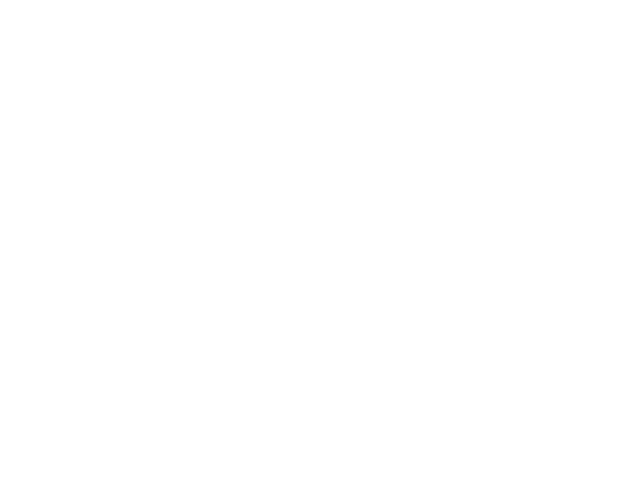

Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
(1,1)-reg SplitNetX
(auc* = 0.999996)
[(0.001000039413011162, 0.9952826304549534, 0.02260639047794315), (0.00010064533225414936, 0.9952815786512864, 0.06436214649063336), (1.0030775806834243e-05, 0.9952721124182828, 0.2741733391516677), (1.012722557420765e-06, 0.9868043040456768, 0.9899814037405033), (1.446746510601093e-07, 0.7283288118833228, 0.9999990098993634), (4.822488368670309e-08, 0.62701513840808, 0.999999148919894), (4.822488368670309e-08, 0.62701513840808, 0.999999148919894)]
7
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
1-reg SplitNet
(auc* = 0.996676)
[(0.001000087637894849, 0.9850459512652644, 0.5550165574271295), (0.00010001840876622221, 0.5676053230286201, 0.8544116780864717), (1.0079000690520947e-05, 0.14630404943202163, 0.9364698152865305), (1.012722557420765e-06, 0.018644797704189173, 0.9985259189268827), (1.9289953474681237e-07, 0.0, 0.999

<IPython.core.display.Javascript object>


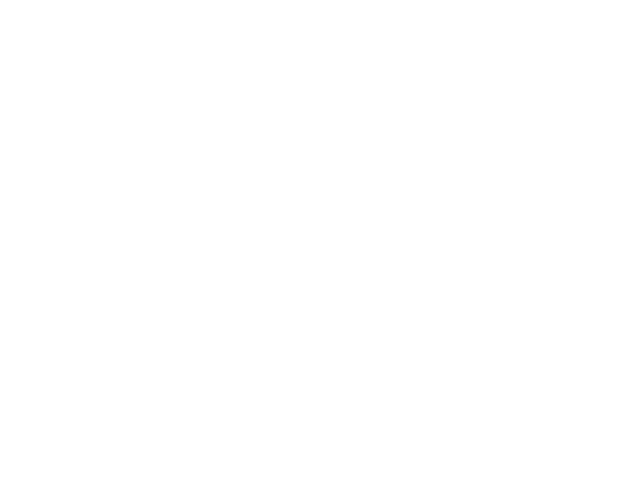

Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
(1,1)-reg SplitNetX
(auc* = 0.999989)
[(0.001000039413011162, 0.9976068816146312, 0.02260639047794315), (0.00010064533225414936, 0.9976055186586853, 0.06436214649063336), (1.0030775806834243e-05, 0.9976011571996587, 0.2741733391516677), (1.012722557420765e-06, 0.9921626903847037, 0.9899814037405033), (1.446746510601093e-07, 0.860997534575309, 0.9999990098993634), (4.822488368670309e-08, 0.8098629711741278, 0.999999148919894), (4.822488368670309e-08, 0.8098629711741278, 0.999999148919894)]
7
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
1-reg SplitNet
(auc* = 0.998148)
[(0.001000184087662222, 0.9917175489728035, 0.5550152113502032), (0.00010001840876622221, 0.7773363001186573, 0.8544116780864717), (1.0079000690520947e-05, 0.4099316257698477, 0.9364698152865305), (1.012722557420765e-06, 0.12326573573869248, 0.9985259189268827), (1.9289953474681237e-07, 1.3629559

<IPython.core.display.Javascript object>


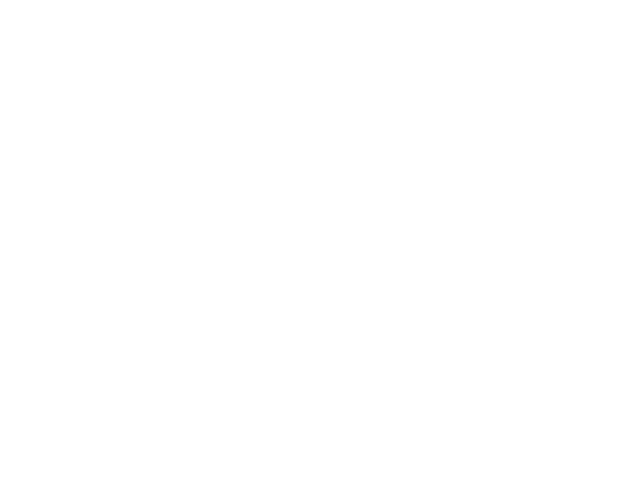

Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
(1,1)-reg SplitNetX
(auc* = 0.999986)
[(0.001000039413011162, 0.9979280523651737, 0.02260639047794315), (0.00010064533225414936, 0.9979278382824369, 0.06436214649063336), (1.0030775806834243e-05, 0.9979244129586483, 0.2741733391516677), (1.012722557420765e-06, 0.9928211086789629, 0.9899814037405033), (1.446746510601093e-07, 0.8836577521950748, 0.9999990098993634), (4.822488368670309e-08, 0.8430554625830148, 0.999999148919894), (4.822488368670309e-08, 0.8430554625830148, 0.999999148919894)]
7
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
1-reg SplitNet
(auc* = 0.998497)
[(0.001000184087662222, 0.992459094771045, 0.5550152113502032), (0.00010001840876622221, 0.8276320858934579, 0.8544116780864717), (1.0079000690520947e-05, 0.5230343116526047, 0.9364698152865305), (1.012722557420765e-06, 0.1970295482288141, 0.9985259189268827), (1.9289953474681237e-07, 2.99715831

<IPython.core.display.Javascript object>


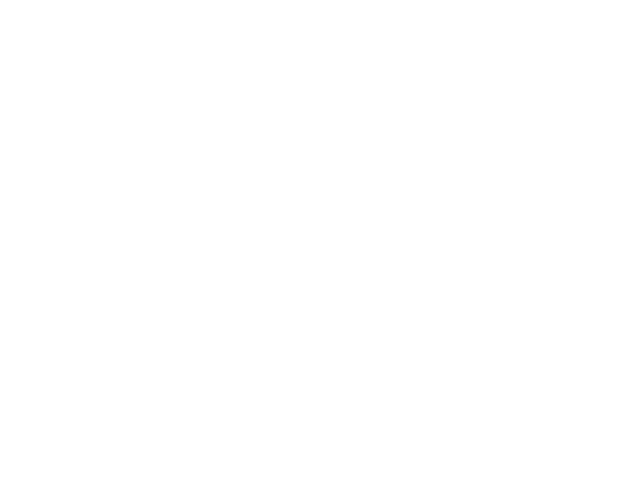

Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
(1,1)-reg SplitNetX
(auc* = 0.999989)
[(0.001000039413011162, 0.9981436666237717, 0.02260639047794315), (0.00010064533225414936, 0.9981433736025755, 0.06436214649063336), (1.0030775806834243e-05, 0.9981404433906138, 0.2741733391516677), (1.012722557420765e-06, 0.9721574481176563, 0.9899814037405033), (1.446746510601093e-07, 0.8108364599470361, 0.9999990098993634), (4.822488368670309e-08, 0.7772404077210063, 0.999999148919894), (4.822488368670309e-08, 0.7772404077210063, 0.999999148919894)]
7
Y_TRUTH:
[True, True, True, True, True, True, True, True, True, True]
Label:  SplitNet
1-reg SplitNet
(auc* = 0.998665)
[(0.001000087637894849, 0.9928830570888763, 0.5550165574271295), (0.00010001840876622221, 0.8522258504170835, 0.8544116780864717), (1.0079000690520947e-05, 0.5423453867009759, 0.9364698152865305), (1.012722557420765e-06, 0.188193229518664, 0.9985259189268827), (1.9289953474681237e-07, 1.17208478

In [13]:
"""
roc_info = {}
for k in presel_eff:
    if k > 0:
        mass = '%d MeV' % k
        print(mass)
        roc_info[k] = plotROC([a['ParticleNet_disc'], a['discValue_']], test_labels, 
                sample_weight=np.logical_or(test_extra_labels == 0, test_extra_labels == k),
                sig_eff=presel_eff[k], bkg_eff=presel_eff[0],
                labels=['SplitNet', 'BDT'], xlim=[1e-6, .01], ylim=[0, 1], logx=True, energy=k)
        #**NOTE:**  The sample_weight line is critical!!  Selects only bkg+sig[k].
"""
roc_info = {}
#y_preds_ = [[a['ParticleNet_disc'], a['discValue_']], [b['ParticleNet_disc'], b['discValue_']], [c['ParticleNet_disc'], c['discValue_']]]
y_preds_ = [[a['ParticleNet_disc'], a['discValue_']], [b['ParticleNet_disc'], b['discValue_']]]
#test_labels_ = [test_labels, test_labels_b, test_labels_c]
test_labels_ = [test_labels, test_labels_b]
#print(a['ParticleNet_disc'][:10])
for k in presel_eff:
    if k > 0:
        mass = '%d MeV' % k
        print(mass)
        weights = [np.logical_or(test_extra_labels==0, test_extra_labels==k),
                  np.logical_or(test_extra_labels_b==0, test_extra_labels_b==k)]
                  #np.logical_or(test_extra_labels_c==0, test_extra_labels_c==k)]
        print(type(weights))
        roc_info[k] = plotROC_multi(y_preds_, test_labels_, 
                sample_weight_=weights,
                sig_eff=presel_eff[k], bkg_eff=presel_eff[0],
                labels=['SplitNet', 'BDT'], xlim=[1e-9, 0.1], ylim=[0, 1], logx=True, energy=k, output=f'v14_pnx_ROC_{mass}')
# NOTE:  add 'BDT' to labels list if desired

In [114]:
disc_threshold_a = 0.9999991
#disc_threshold_a = 0.001

bkg_pt = a['TargetSPRecoilE_pt'][test_extra_labels==0]
bkg_disc_value = a['ParticleNet_disc'][test_extra_labels==0]
bkg_maxPE = a['maxPE'][test_extra_labels==0]

nPass = np.sum( (bkg_disc_value > disc_threshold_a) * (bkg_pt != -999) )
nPass_veto = np.sum( (bkg_disc_value > disc_threshold_a) * (bkg_pt != -999) * (bkg_maxPE < 8) )

print(nPass)
print(nPass_veto)

1
1


In [14]:
masses = [0, 1, 10, 100, 1000]
pT_a = {}
nEvents_a = {}
for m in masses:
    pT_a[m] = a['TargetSPRecoilE_pt'][test_extra_labels==m]
    pT_a[m] = pT_a[m][pT_a[m] != -999]
    nEvents_a[m] = len(pT_a[m])
    print(len(pT_a[m]))
print(nEvents_a)

981802
3785062
3659756
4661474
13625662
{0: 981802, 1: 3785062, 10: 3659756, 100: 4661474, 1000: 13625662}


In [77]:
pnx_sig_disc = {}

for m in masses[1:]:
    pnx_sig_disc[m] = a['ParticleNet_disc'][test_extra_labels==m]

pnx_sig_pass = {}
for m in masses[1:]:
    pnx_sig_pass[m] = np.sum( (pnx_sig_disc[m] > disc_threshold_a) * (a['TargetSPRecoilE_pt'][test_extra_labels==m] != -999) )

pnx_sig_eff = {}
for m in masses[1:]:
    pnx_sig_eff[m] = (pnx_sig_pass[m] / nEvents[m]) * presel_eff[m]
    
print(pnx_sig_eff)

{1: 0.6616581328392115, 10: 0.8204430529990413, 100: 0.8214333202495998, 1000: 0.7789788386270363}


In [81]:
disc_threshold_b = 0.95

bkg_pt_b = np.array(b['TargetSPRecoilE_pt'][test_extra_labels_b==0])
bkg_disc_value_b = b['ParticleNet_disc'][test_extra_labels_b==0]
bkg_maxPE_b = b['maxPE'][test_extra_labels_b==0]

nPass_b = np.sum( (bkg_disc_value_b > disc_threshold_b) * (bkg_pt_b.T[0] != -999) )
nPass_veto_b = np.sum( (bkg_disc_value_b > disc_threshold_b) * (bkg_pt_b.T[0] != -999) * (bkg_maxPE_b < 8) )

print(nPass_b)
print(nPass_veto_b)

113
0


In [48]:
pT_b = {}
nEvents_b = {}
for m in masses:
    pT_b[m] = np.array(b['TargetSPRecoilE_pt'][test_extra_labels_b==m]).T[0]
    print(len(pT_b[m]))
    pT_b[m] = pT_b[m][pT_b[m] != -999]
    nEvents_b[m] = len(pT_b[m])
    print(len(pT_b[m]))
print(nEvents_b)

981802
981802
3785062
3783143
3659756
3630028
4661474
4486595
13625662
13475484
{0: 981802, 1: 3783143, 10: 3630028, 100: 4486595, 1000: 13475484}


In [83]:
thresholds = [0.5, 0.73, 0.88, 0.95] #(24k, 10k, 1k, 100)
pT_pass_b = {}
for m in masses:
    disc_value = np.array(b['ParticleNet_disc'][test_extra_labels_b==m])
    print(disc_value.shape)
    pt = np.array(b['TargetSPRecoilE_pt'][test_extra_labels_b==m])
    print(pt.T[0])
    print(pt.shape)
    disc_value = disc_value[pt.T[0]!=-999]
    pT_pass_b[m] = [pT_b[m][disc_value > threshold] for threshold in thresholds]
    print(len(pT_pass_b[m]))

(981802,)
[1.85805321 3.27920294 0.68218046 ... 3.50796485 2.82905293 4.02590084]
(981802, 1)
4
(3785062,)
[2.18705893 6.13530159 5.38155508 ... 4.40631628 9.31886864 6.45992804]
(3785062, 1)
4
(3659756,)
[ 0.83014333  2.53539848 20.0387001  ...  2.46014738  7.35187483
 10.69134426]
(3659756, 1)
4
(4661474,)
[ 9.81662655 18.01444626 51.88372803 ... 14.30805874  0.32359737
  6.96215105]
(4661474, 1)
4
(13625662,)
[ 17.88724327  29.75032616  39.35583878 ... 605.12432861 206.91059875
 236.27598572]
(13625662, 1)
4


In [50]:
print(pT_pass_b)

{0: array([4.89962101, 3.21061754, 4.06165695, ..., 2.03847647, 7.89108324,
       1.59283412]), 1: array([2.18705893, 6.13530159, 5.38155508, ..., 4.40631628, 9.31886864,
       6.45992804]), 10: array([ 0.83014333,  2.53539848, 20.0387001 , ...,  2.46014738,
        7.35187483, 10.69134426]), 100: array([ 9.81662655, 18.01444626, 51.88372803, ..., 14.30805874,
        0.32359737,  6.96215105]), 1000: array([ 17.88724327,  29.75032616,  39.35583878, ..., 605.12432861,
       206.91059875, 236.27598572])}


<IPython.core.display.Javascript object>


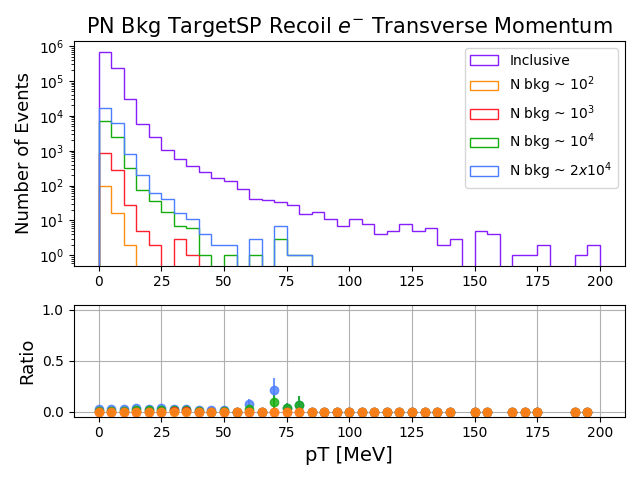

/tmp/ipykernel_259219/4263046144.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio_arr = val / n1
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: invalid value encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: divide by zero encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: invalid value encountered in multiply
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )


<IPython.core.display.Javascript object>


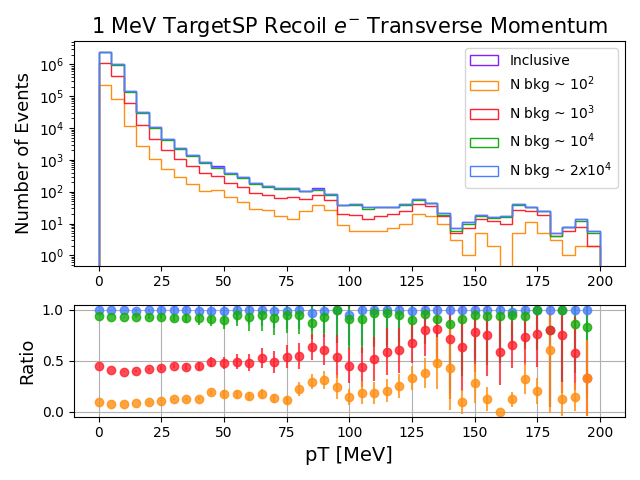

/tmp/ipykernel_259219/4263046144.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio_arr = val / n1
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: invalid value encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: divide by zero encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: invalid value encountered in multiply
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )


<IPython.core.display.Javascript object>


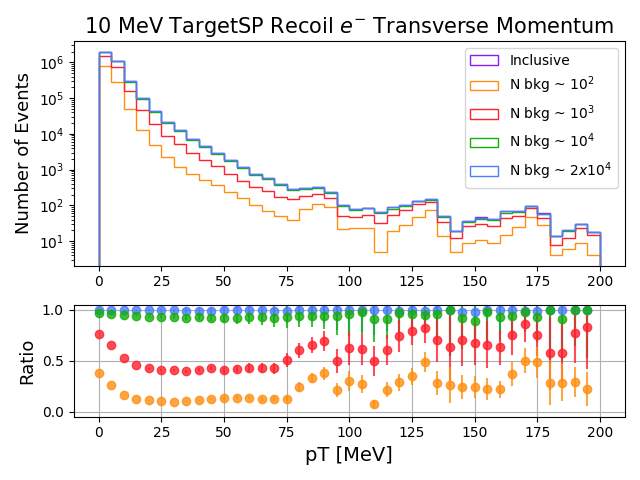

/tmp/ipykernel_259219/4263046144.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio_arr = val / n1
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: invalid value encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: divide by zero encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )


<IPython.core.display.Javascript object>


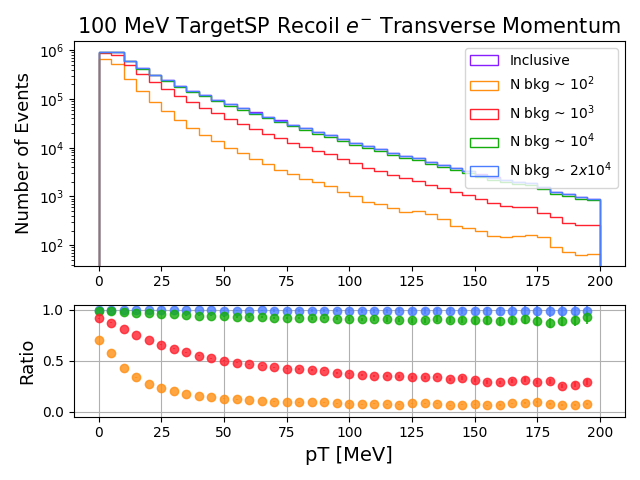

/tmp/ipykernel_259219/4263046144.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio_arr = val / n1
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: invalid value encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: divide by zero encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )


<IPython.core.display.Javascript object>


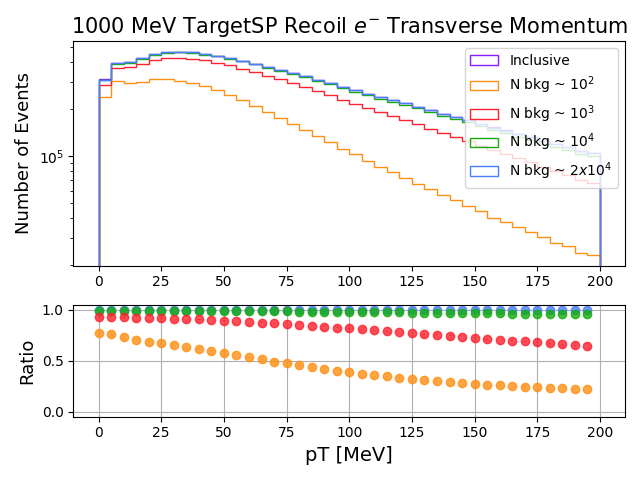

/tmp/ipykernel_259219/4263046144.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio_arr = val / n1
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: invalid value encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )
/tmp/ipykernel_259219/4263046144.py:27: RuntimeWarning: divide by zero encountered in true_divide
  err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) )


In [89]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

colors = ['#4A7DFF', '#14AD0C', '#FF212E', '#FF8F13', '#871EFE']

for m in masses:
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [2, 1]})
    #if m == 1000:
        #ax1.set_ylim(100, 1300)
    vals = [pT_b[m], pT_pass_b[m]]
    bins = np.linspace(-50, 200, 51)
    labels = ['N bkg ~ $2 x 10^{4}$', 'N bkg ~ $10^{4}$', 'N bkg ~ $10^{3}$', 'N bkg ~ $10^{2}$']
    n1, bins, _ = ax1.hist(vals[0], bins=bins, range=(0, 250), density=False, stacked=False, histtype='step', color=colors[-1],
                log=True, label='Inclusive')
    n2, bins, _ = ax1.hist(vals[1], bins=bins, range=(0, 250), density=False, stacked=False, histtype='step', color=colors[:-1],
                    log=True, label=labels)
    #n1, bins, _ = ax1.hist(vals[0], bins=bins, range=(0, 250), density=False, stacked=False, histtype='step', color=colors[0], 
                 #log=True, label='Inclusive')
    #n2, bins, _ = ax1.hist(vals[1], bins=bins, range=(0, 250), density=False, stacked=False, histtype='step', color=colors[3], 
                 #log=True, label=f'ParticleNetX_disc > {disc_threshold}')
    ax1.legend()
    
    ratio_arrs = []
    errs = []
    for val in n2:
        ratio_arr = val / n1
        err = (val / n1) * ( (1/np.sqrt(val)) + (1/np.sqrt(n1)) ) 
        #print(type(ratio_arr))
        #print(len(ratio_arr))       
        #print(len(bins[:-1]))
        ratio_arrs.append(ratio_arr)
        errs.append(err)
    
    for i, ratio_arr in enumerate(ratio_arrs):

        ax2.errorbar(bins[:-1],     
            ratio_arr,
            yerr=errs[i],
            fmt='o',
            alpha=0.8,
            color=colors[i])

    '''
    ax2.errorbar(bins[:-1],     # this is what makes it comparable
        n2 / n1, # maybe check for div-by-zero!
        alpha=0.8,
        yerr = (n2 / n1) * ( (1/np.sqrt(n2)) + (1/np.sqrt(n1)) ),
        fmt='o',
        color=colors[1]        
                            )
    '''
    
    ax1.set_xlim(-10, 210)
    ax2.set_xlim(-10, 210)
    ax2.set_ylim(-0.05, 1.05)
    ax2.grid()
    ax2.set_xlabel("pT [MeV]", fontsize=14)
    
    ax1.set_ylabel('Number of Events', fontsize=13)
    
    ax1.set_title(f'{m} MeV TargetSP Recoil $e^{{-}}$ Transverse Momentum' if m!=0 else 'PN Bkg TargetSP Recoil $e^{{-}}$ Transverse Momentum', fontsize=15)
    ax2.set_ylabel('Ratio', fontsize=13)
    plt.tight_layout()
    plt.savefig(f'pT_bias_{m}', facecolor='w', dpi=250)

In [21]:
pn_sig_disc = {}

for m in masses[1:]:
    pn_sig_disc[m] = b['ParticleNet_disc'][test_extra_labels_b==m]

pn_sig_pass = {}
for m in masses[1:]:
    pn_sig_pass[m] = np.sum( (pn_sig_disc[m] > disc_threshold_b) * (b['TargetSPRecoilE_pt'][test_extra_labels_b==m] != -999) * (b['maxPE'][test_extra_labels_b==m] < 8) )

pn_sig_eff = {}
for m in masses[1:]:
    pn_sig_eff[m] = (pn_sig_pass[m] / nEvents_b[m]) * presel_eff[m]
    
print(pn_sig_eff)

{1: 0.9383137884358296, 10: 0.9217755564754457, 100: 0.8871258925311308, 1000: 0.787814956648501}


In [112]:
maxPE = a['maxPE'][test_extra_labels==0]
print(np.sum(maxPE<8))

21
